<a href="https://colab.research.google.com/github/nisrinalifa/Dicoding-DS/blob/main/Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load Data Train
df_train = pd.read_csv('/content/drive/MyDrive/Dicoding/flood/train.csv')
print(df_train)

print('=====================================================================')

# Load Data Test
df_test = pd.read_csv('/content/drive/MyDrive/Dicoding/flood/test.csv')
print(df_test)

              id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0              0                 5                   8                5   
1              1                 6                   7                4   
2              2                 6                   5                6   
3              3                 3                   4                6   
4              4                 5                   3                2   
...          ...               ...                 ...              ...   
1117952  1117952                 3                   3                4   
1117953  1117953                 2                   2                4   
1117954  1117954                 7                   3                9   
1117955  1117955                 7                   3                3   
1117956  1117956                 4                   5                6   

         Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0                   

# Data Cleaning and Transform

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [4]:
# Statistik Deskriptif dari dataset
df_train.describe(include = 'all')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [5]:
# Periksa missing value
missing_values = df_train.isnull().sum()
missing_values[missing_values > 0]

,0


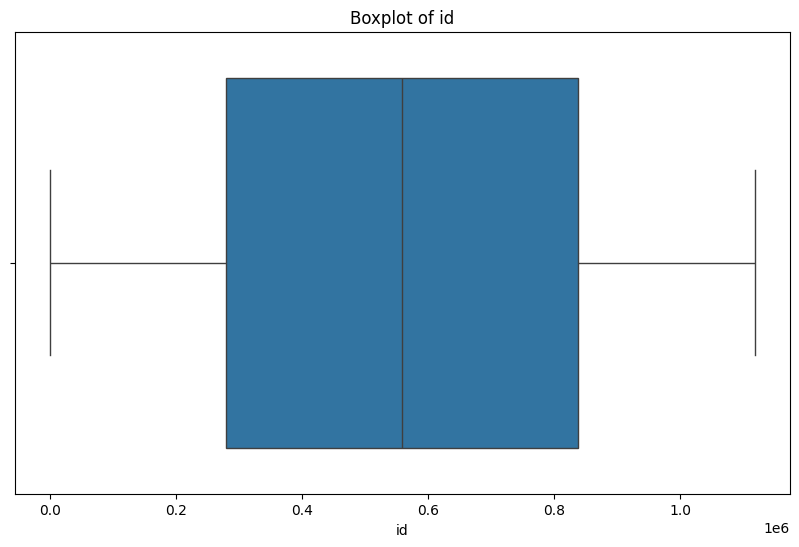

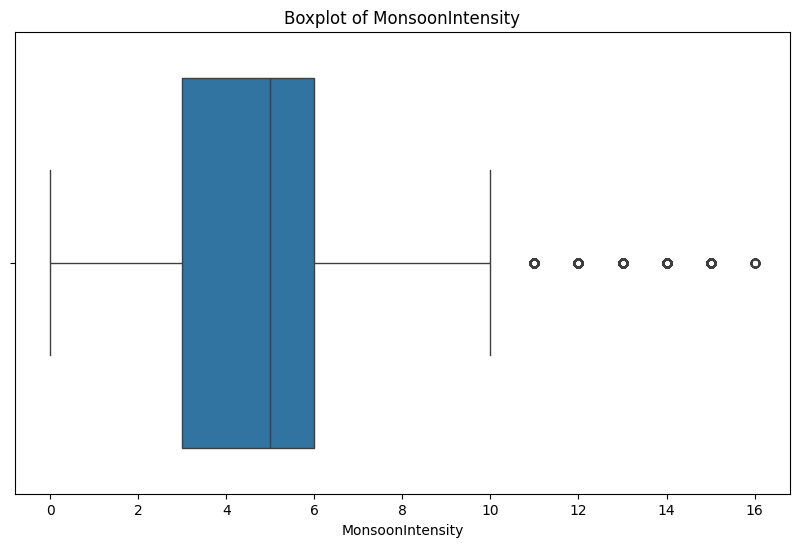

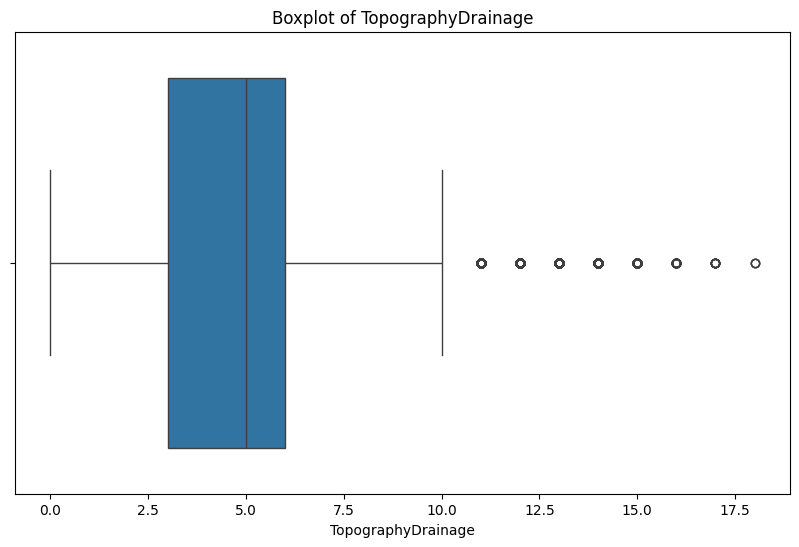

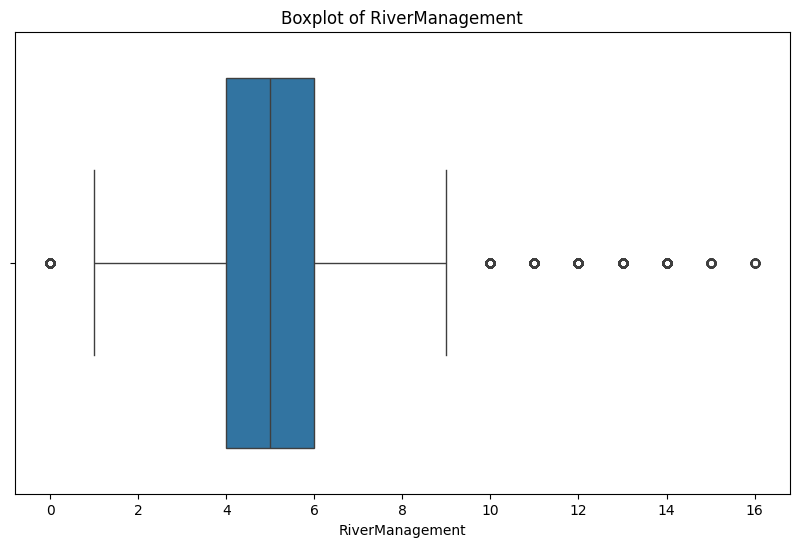

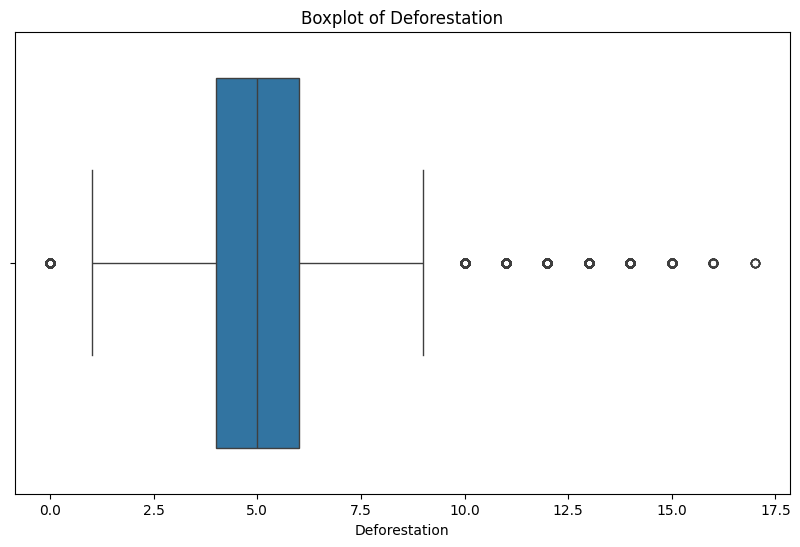

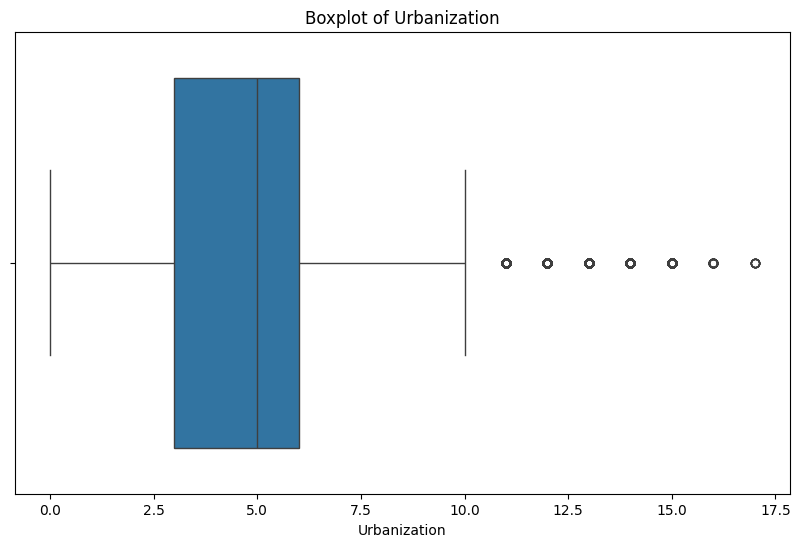

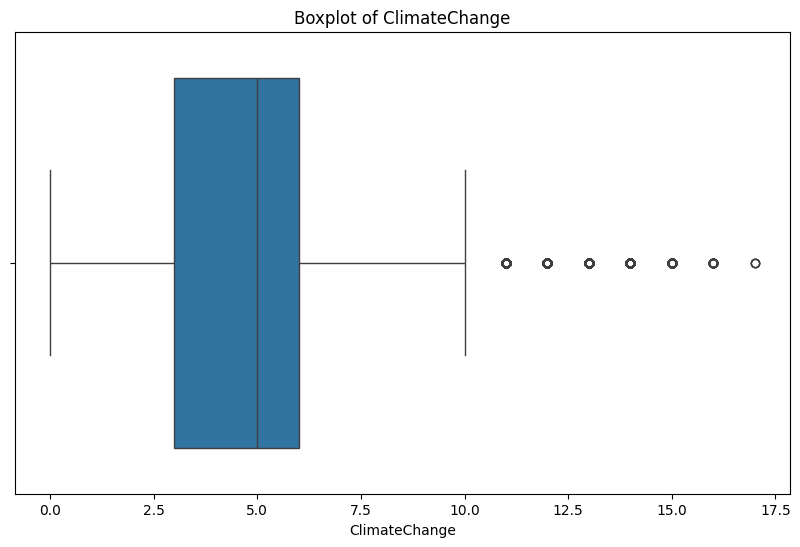

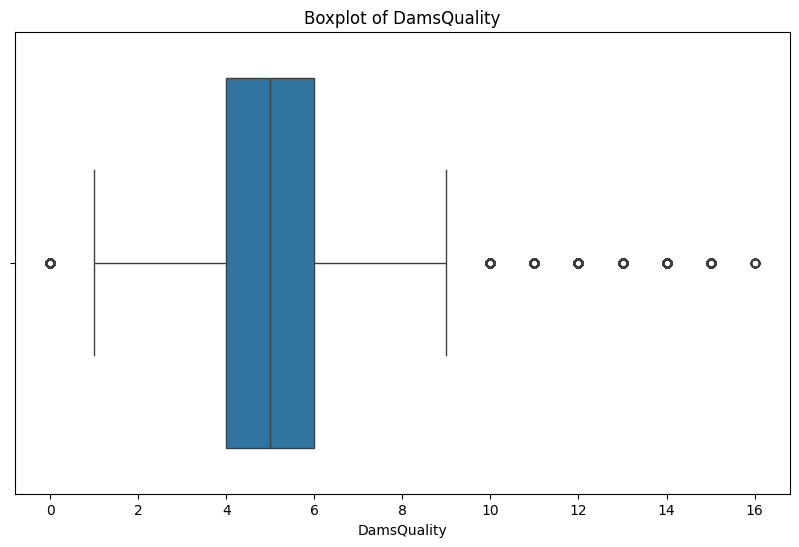

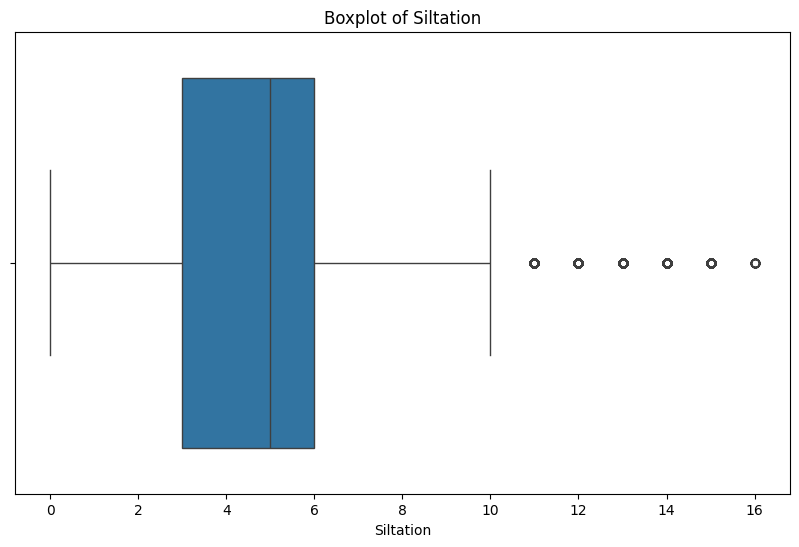

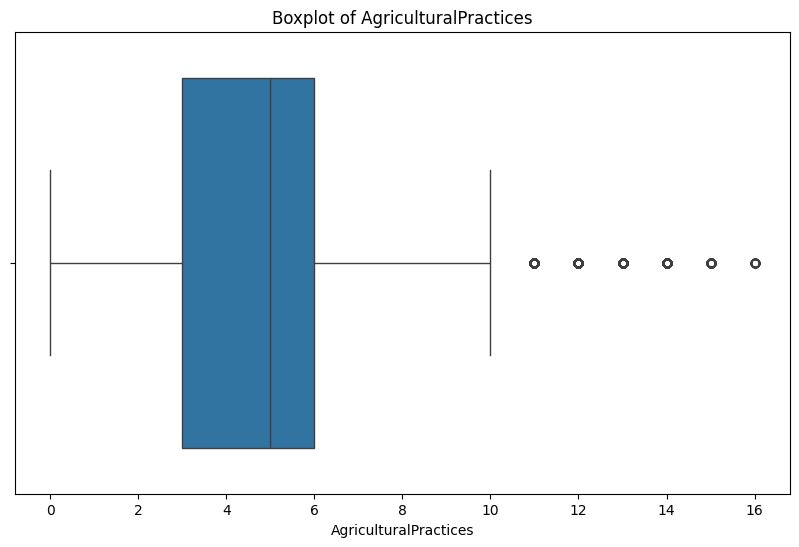

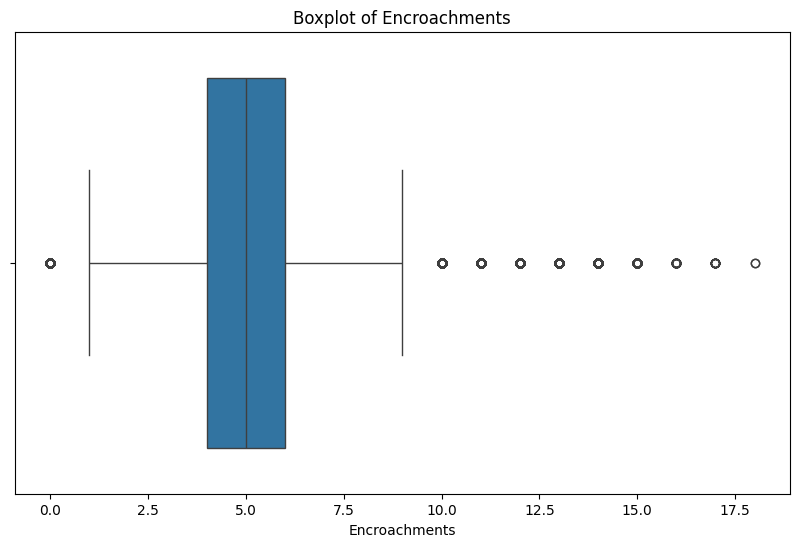

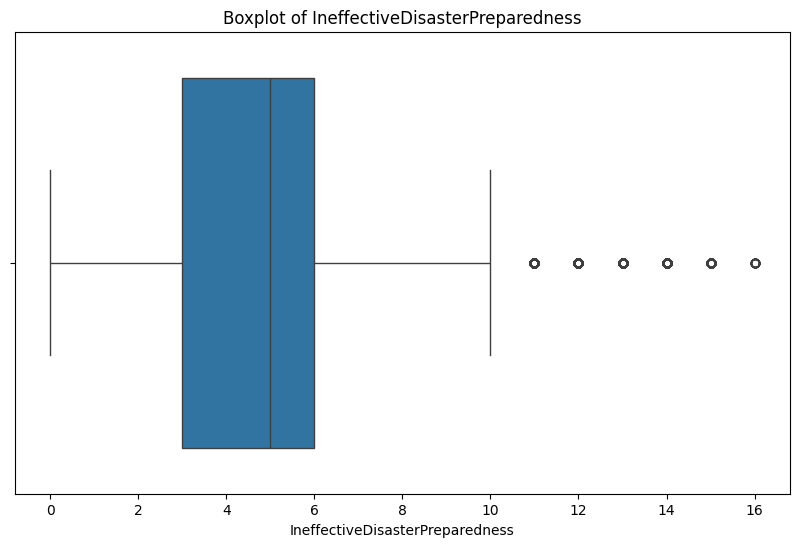

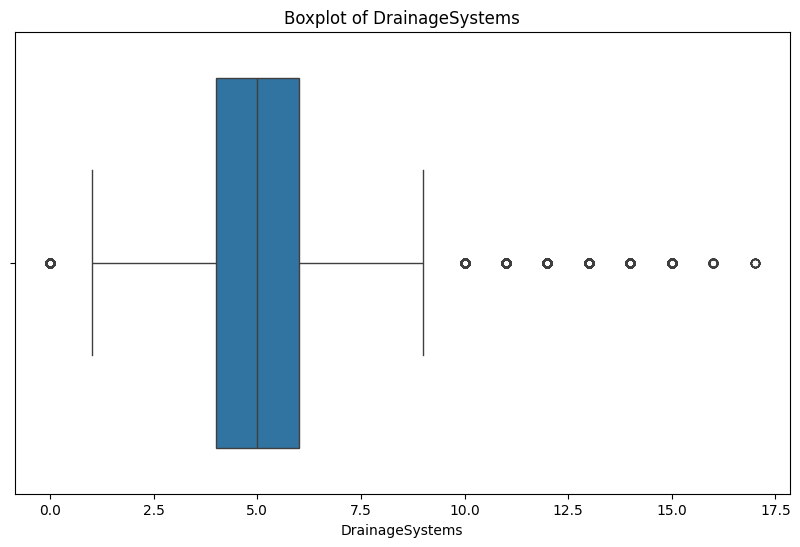

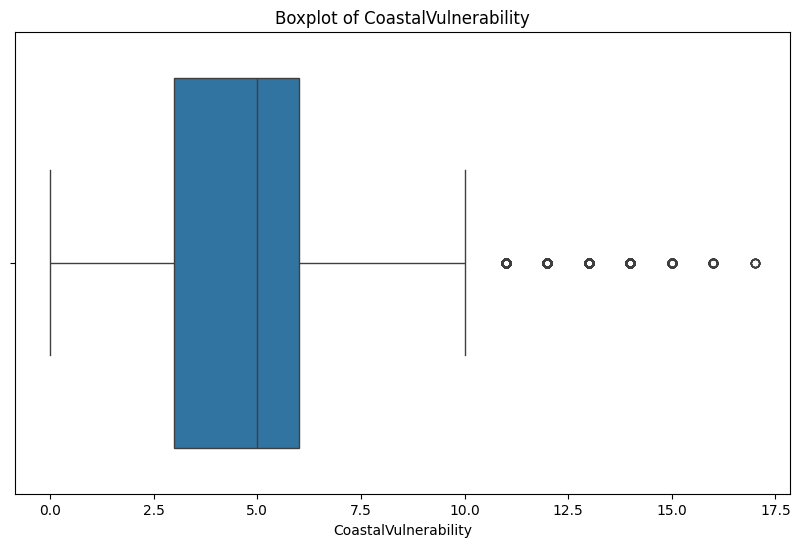

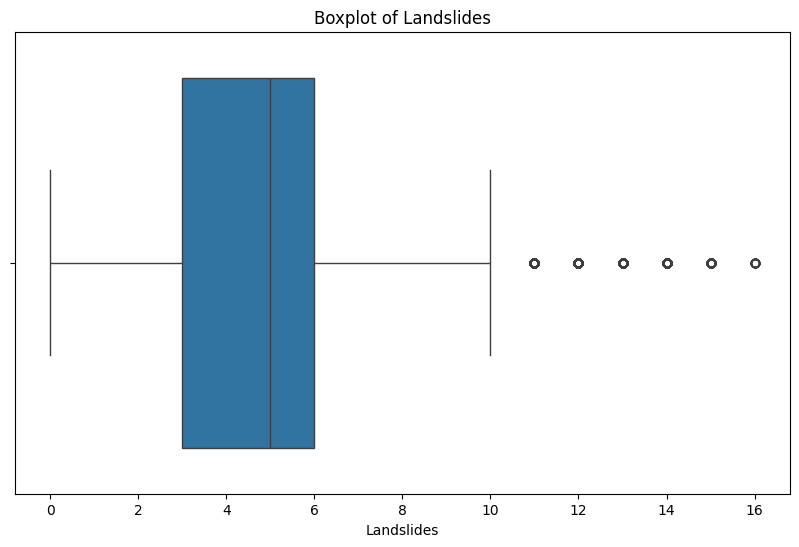

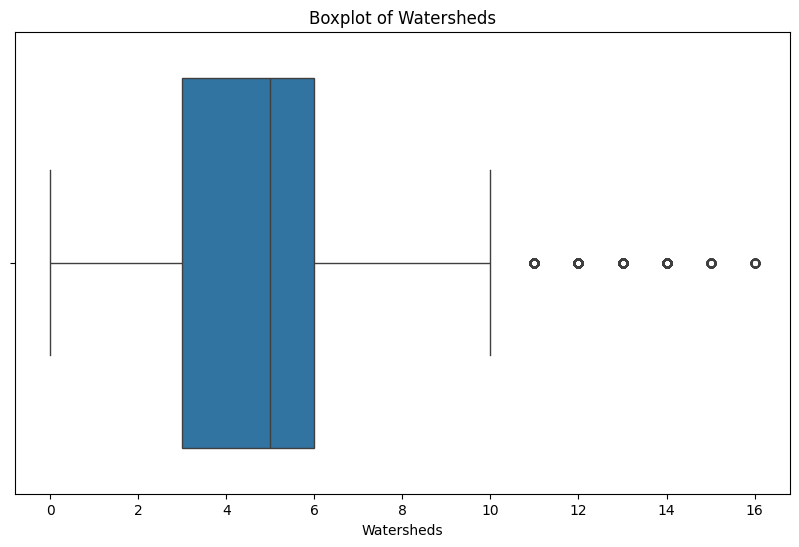

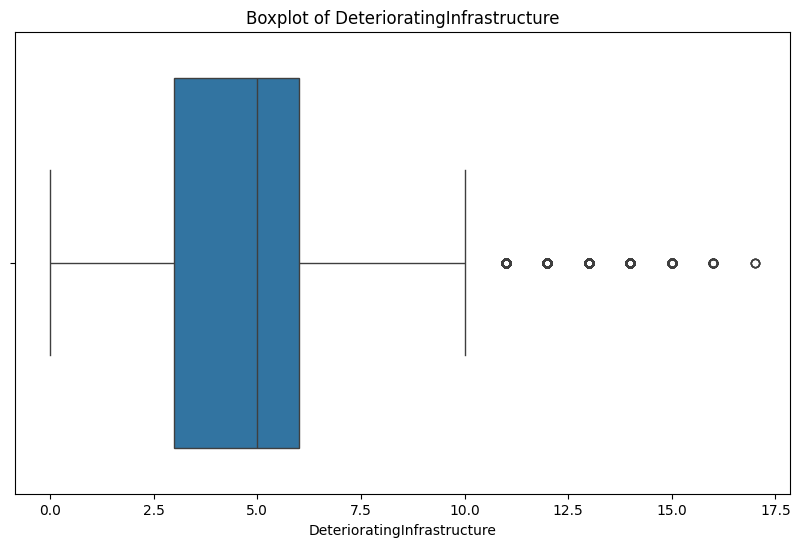

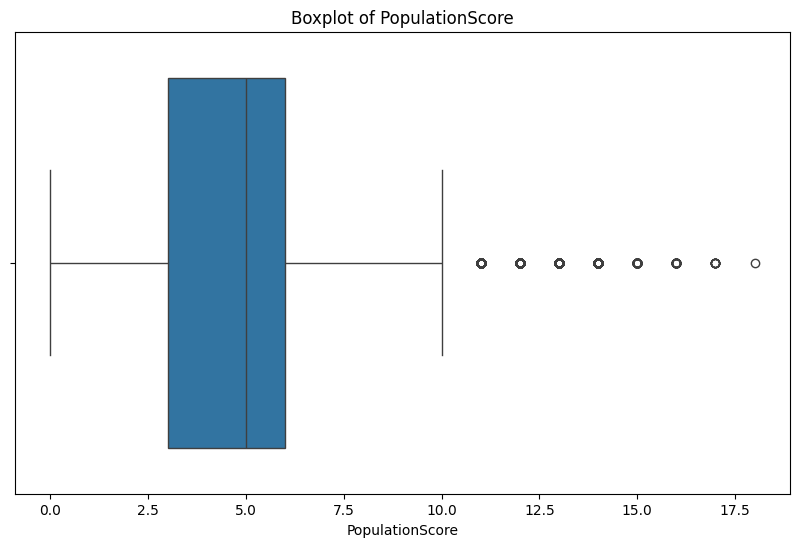

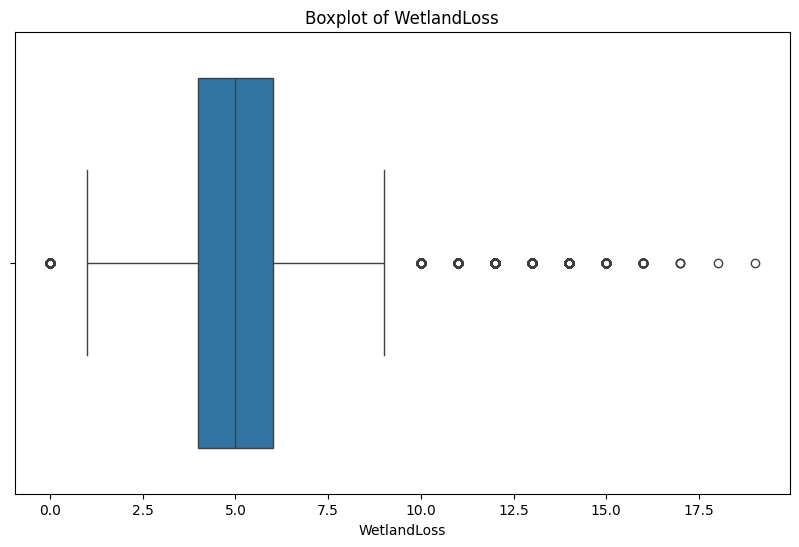

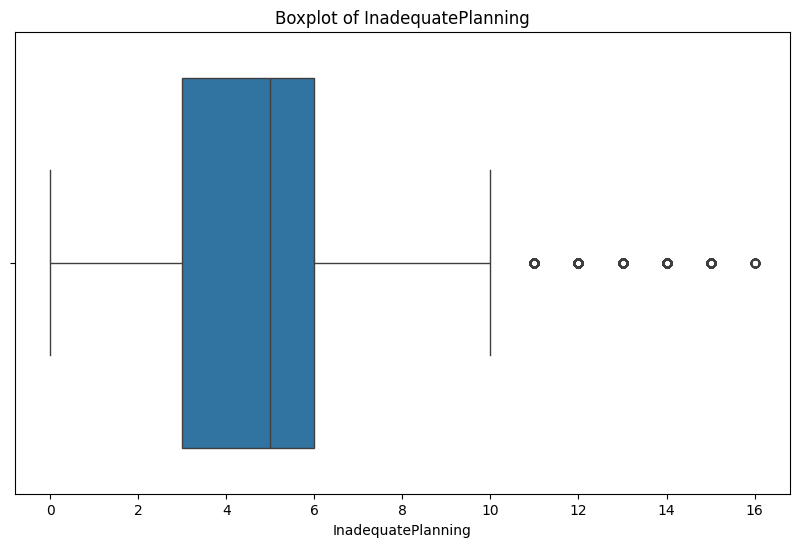

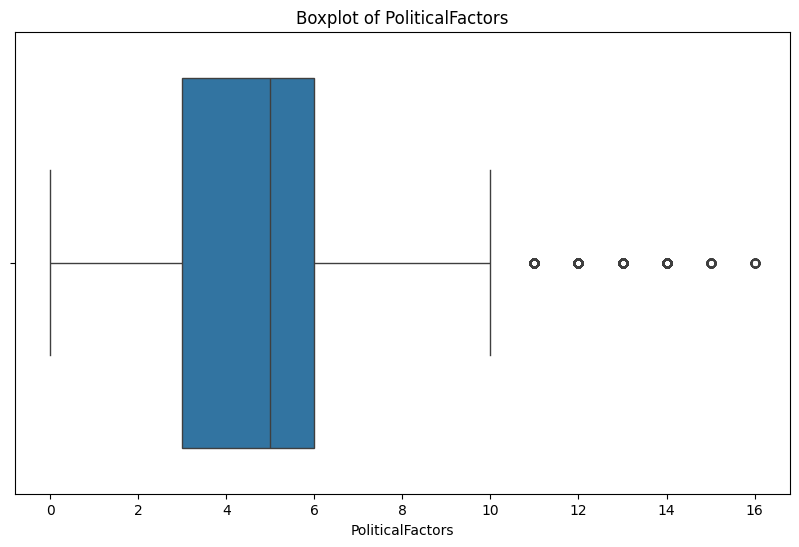

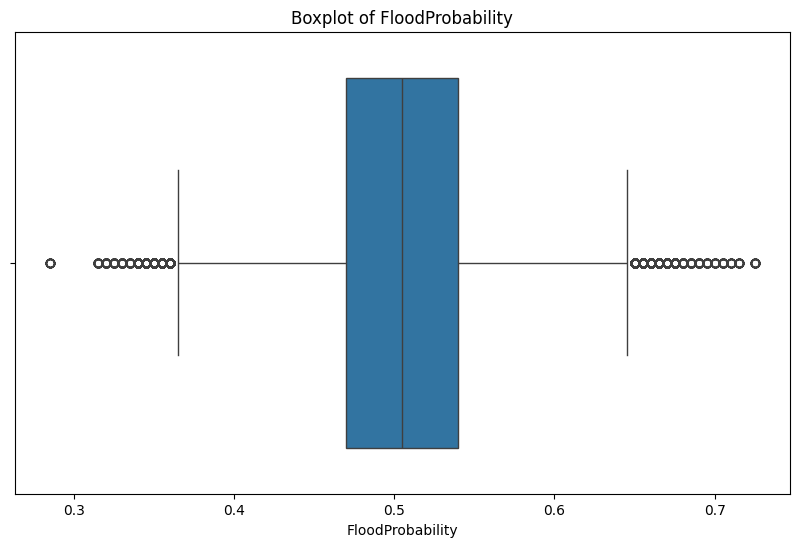

In [6]:
# Periksa outlier dengan Boxplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for feature in df_train.columns:
  plt.figure(figsize = (10, 6))
  sns.boxplot(x = df_train[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

Problem = Ada outlier

Tindakan yang dipilih = Menghapus Outlier

In [7]:
# Identifikasi outlier menggunakan IQR
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

# Filter DataFrame untuk hanya menyimpan baris yang tidak mengandung outlier pada kolom numerik
condition = ~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis = 1)
df = df_train.loc[condition, df_train.columns]

AFTER

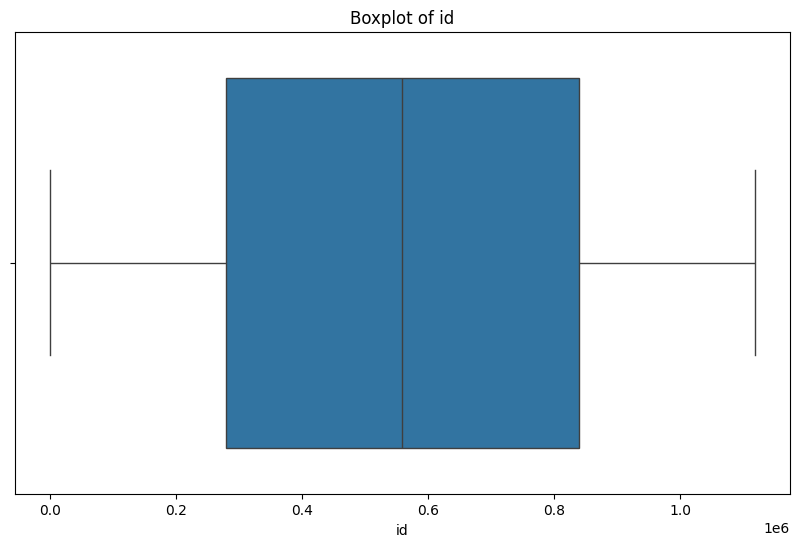

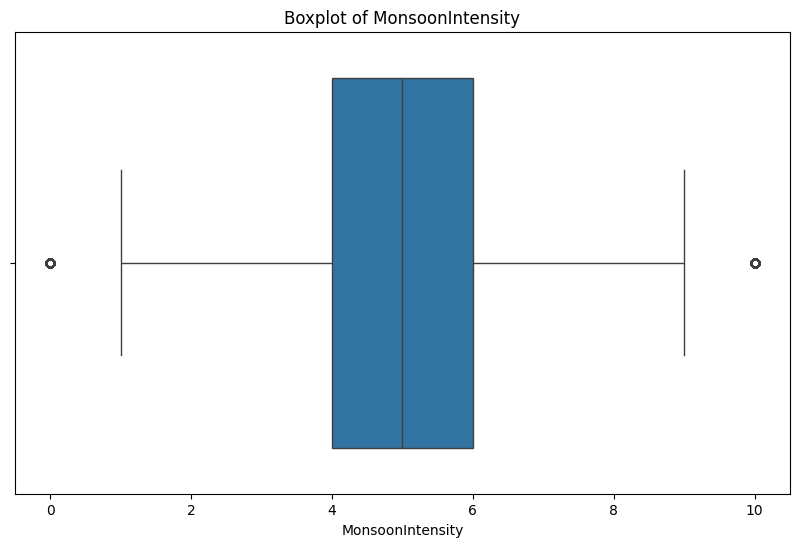

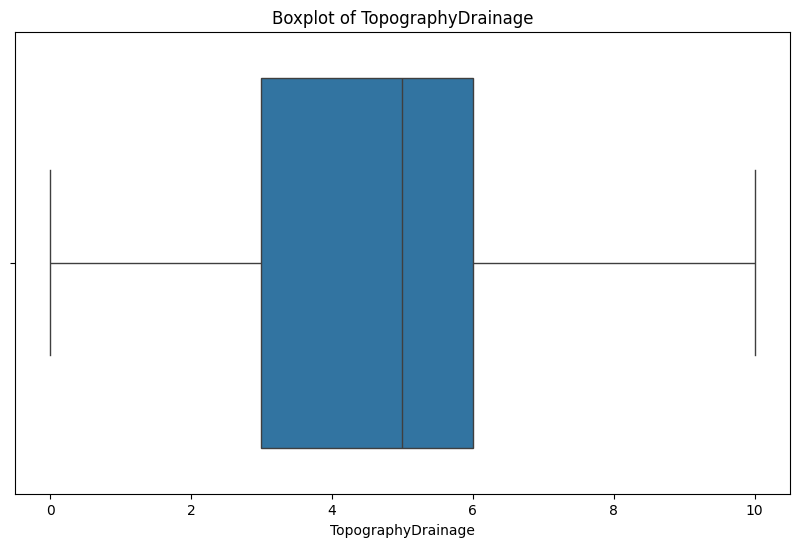

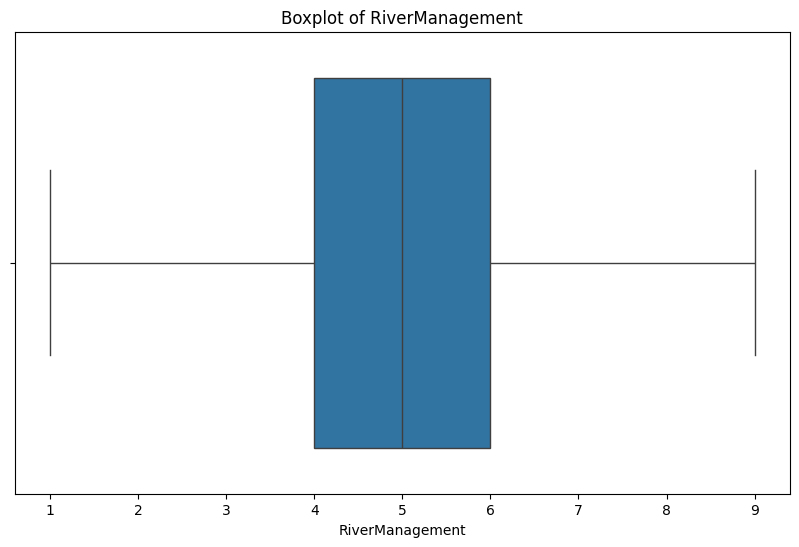

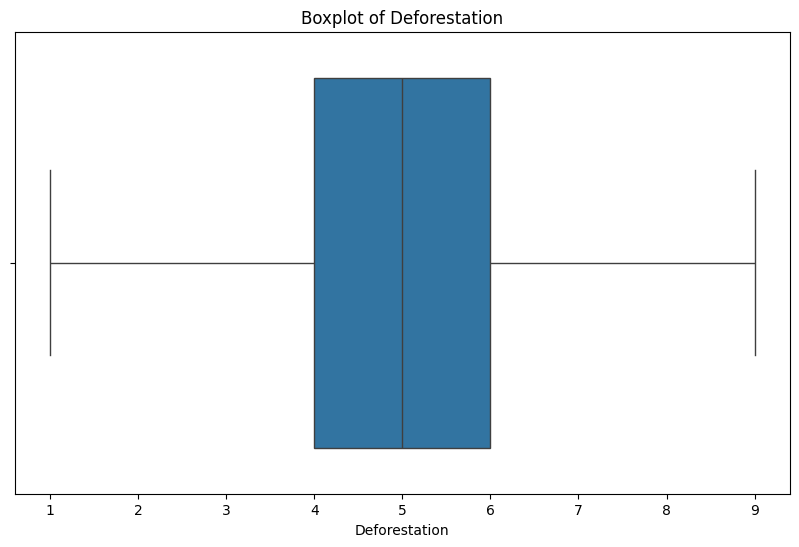

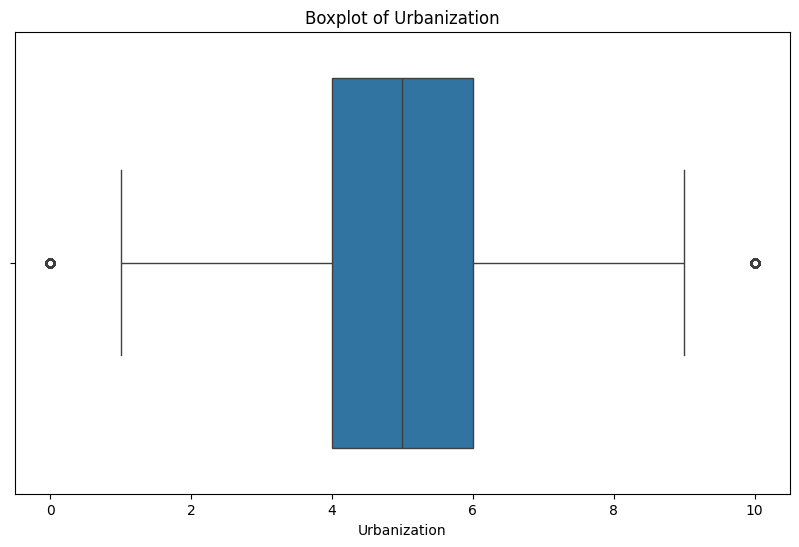

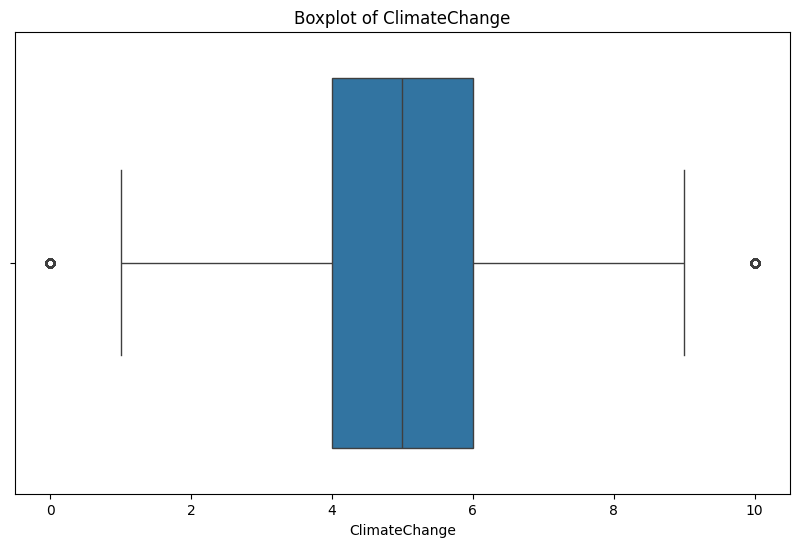

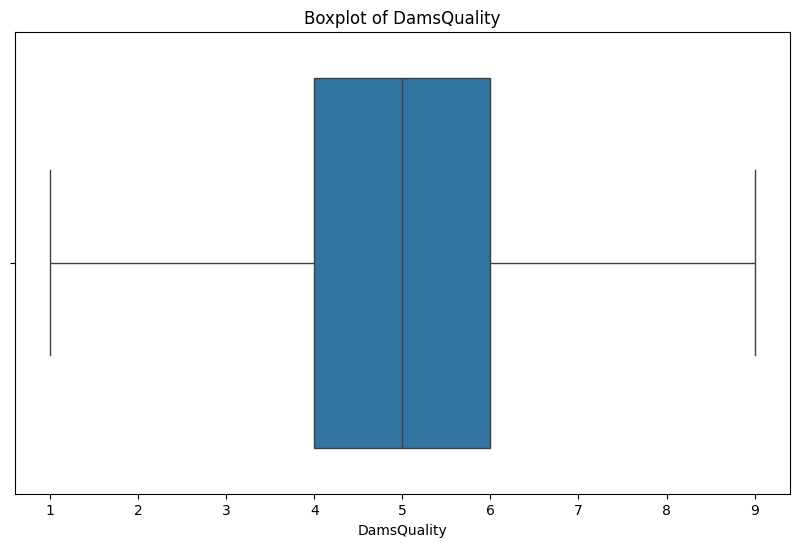

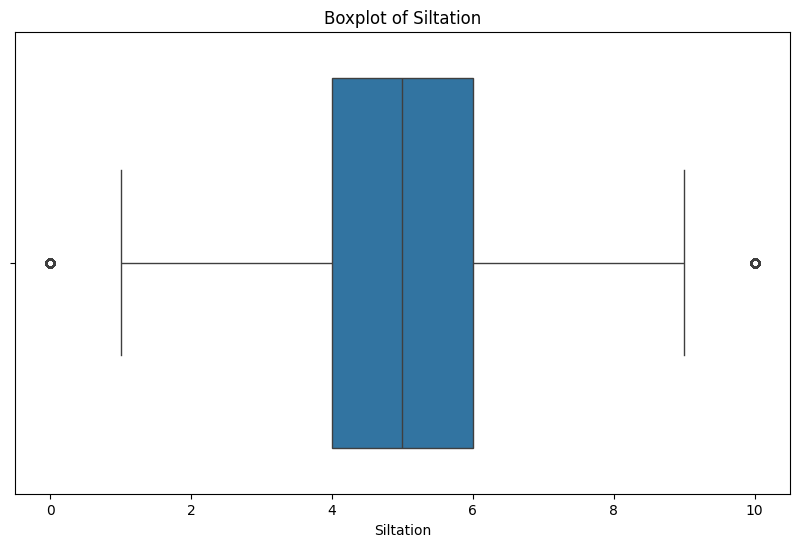

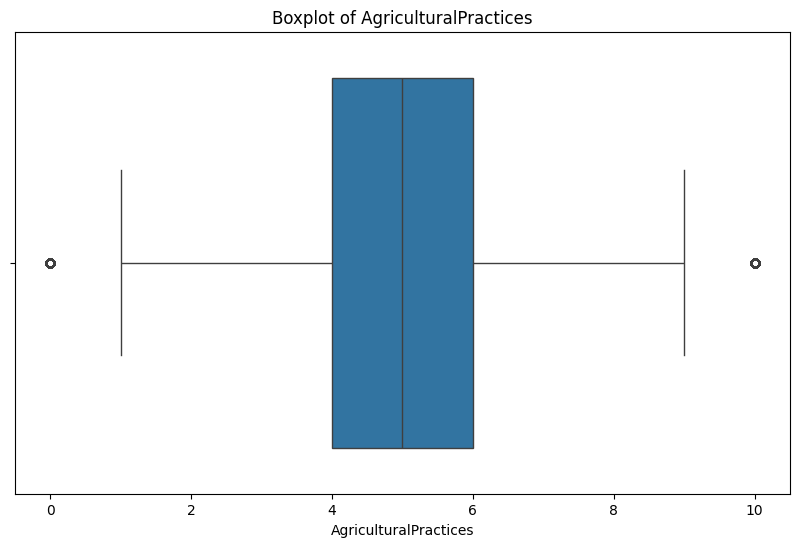

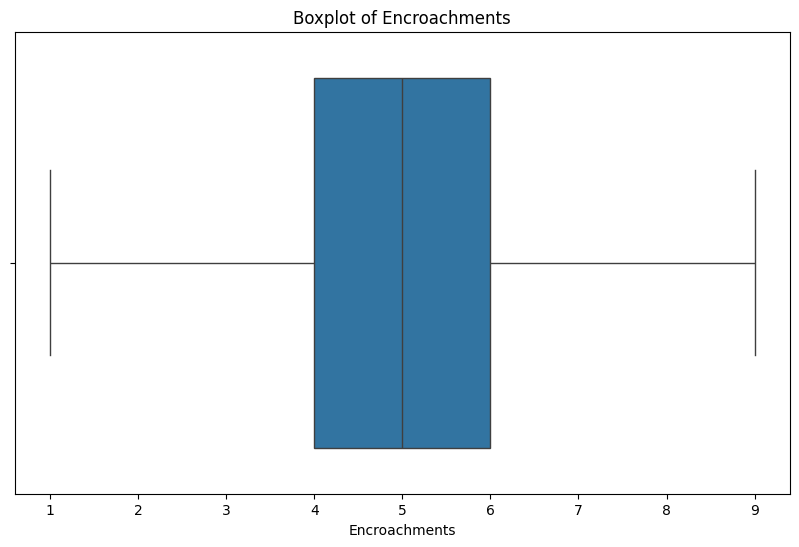

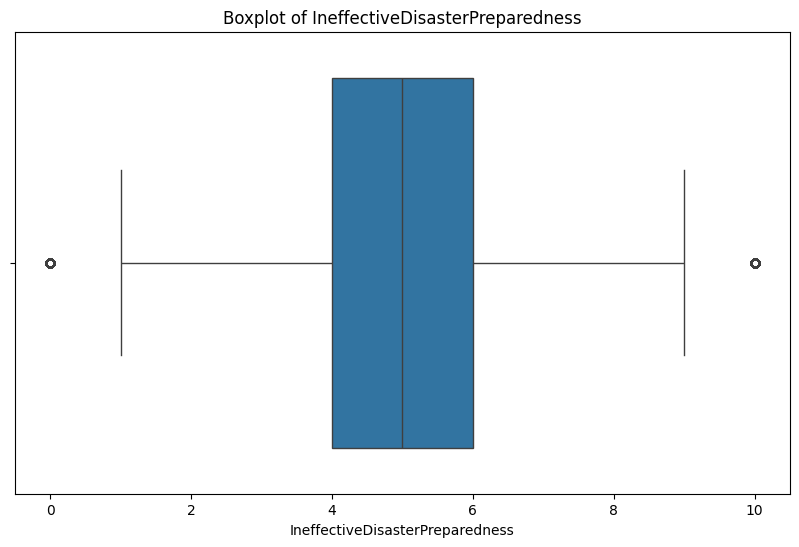

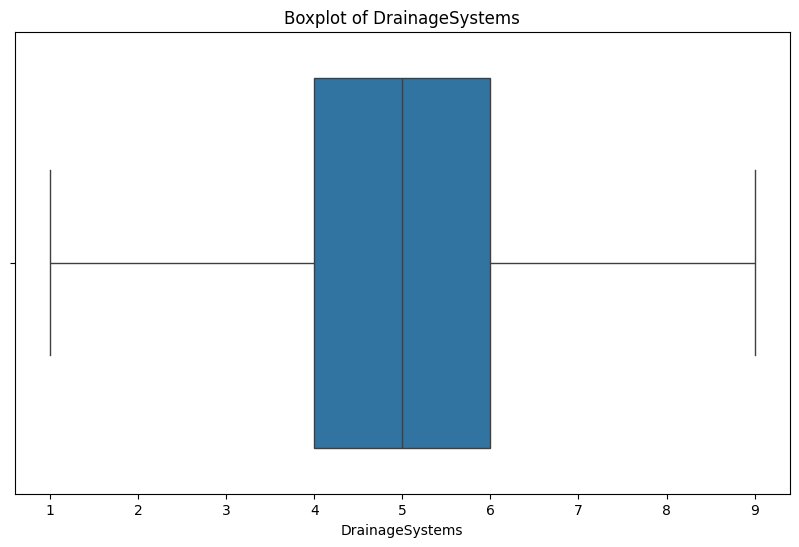

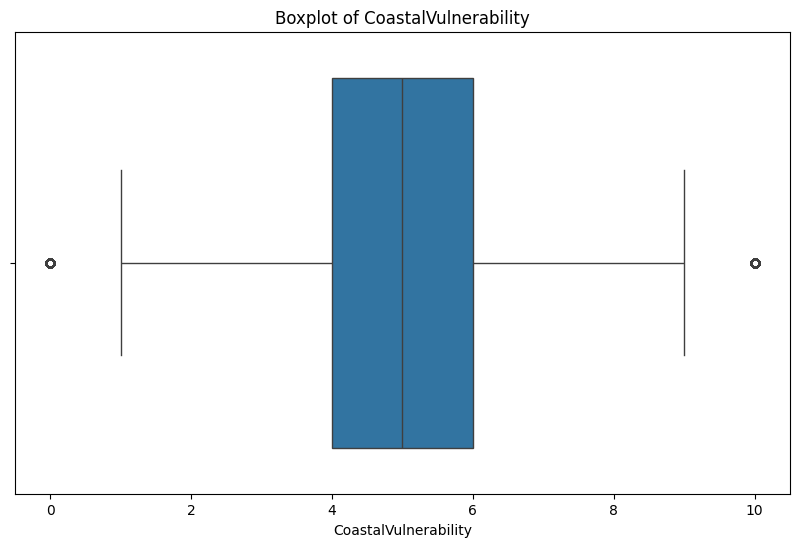

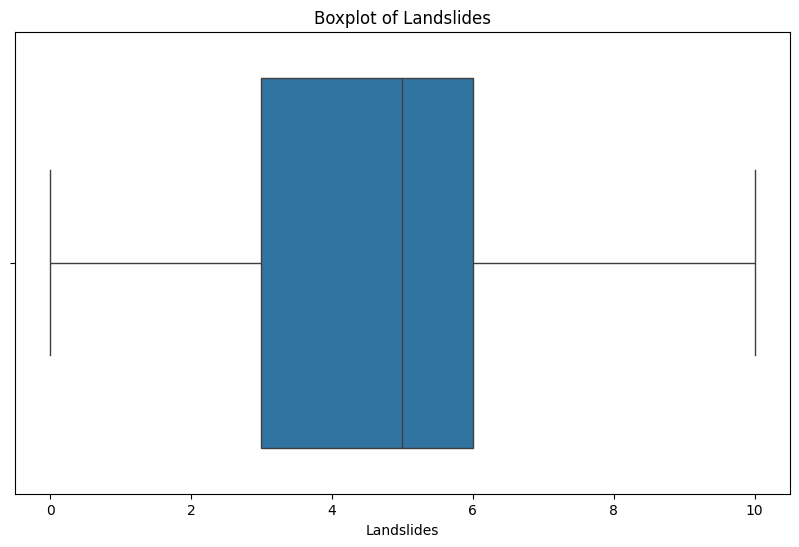

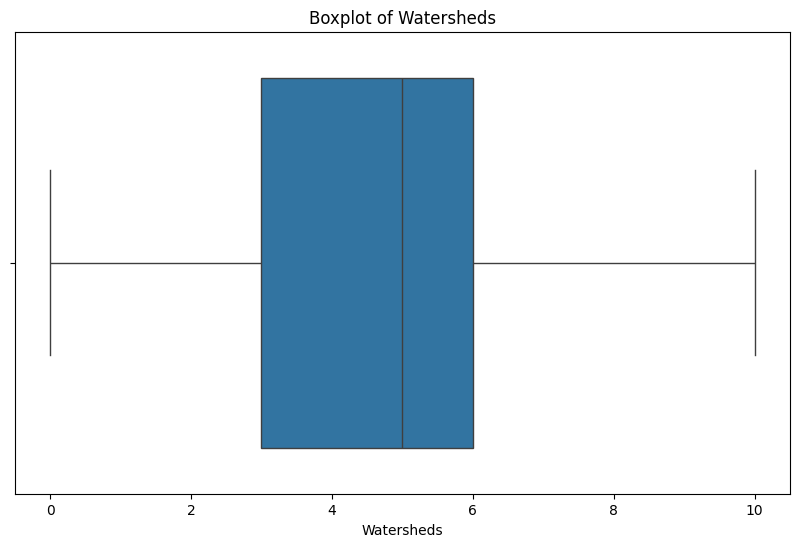

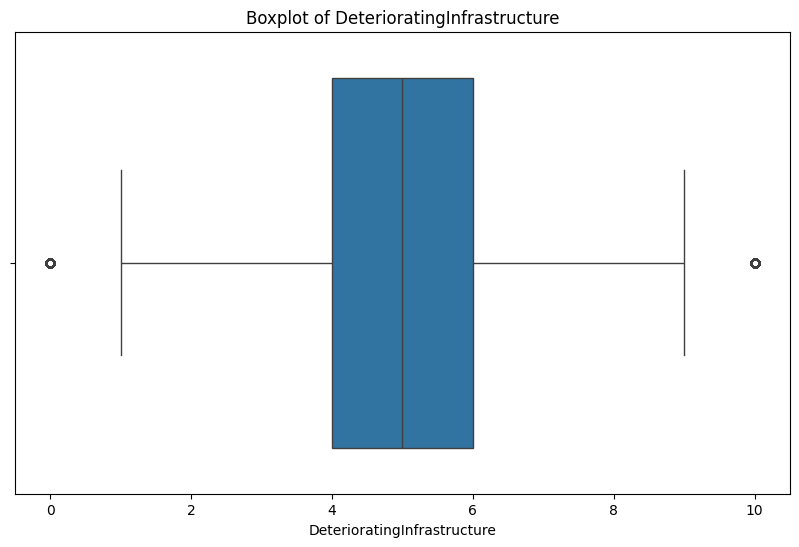

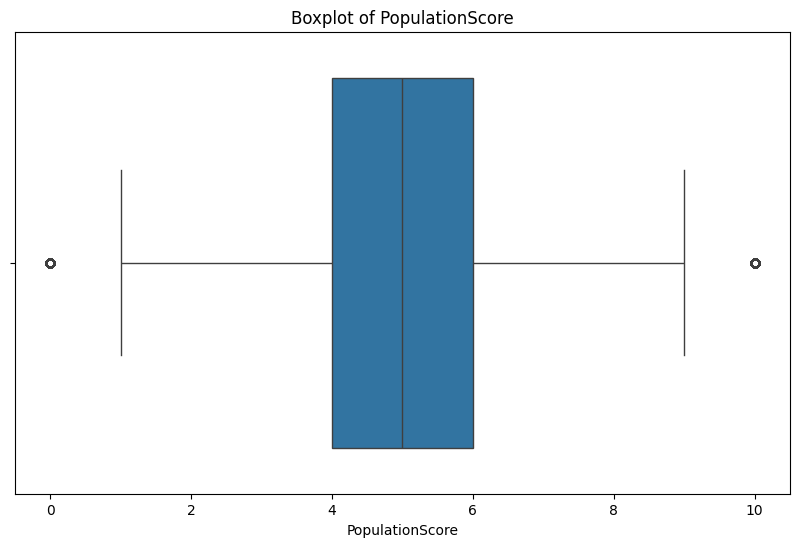

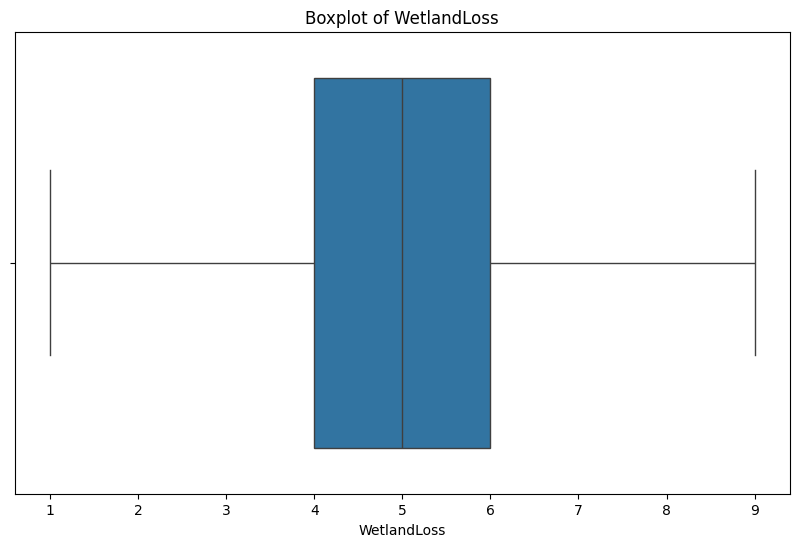

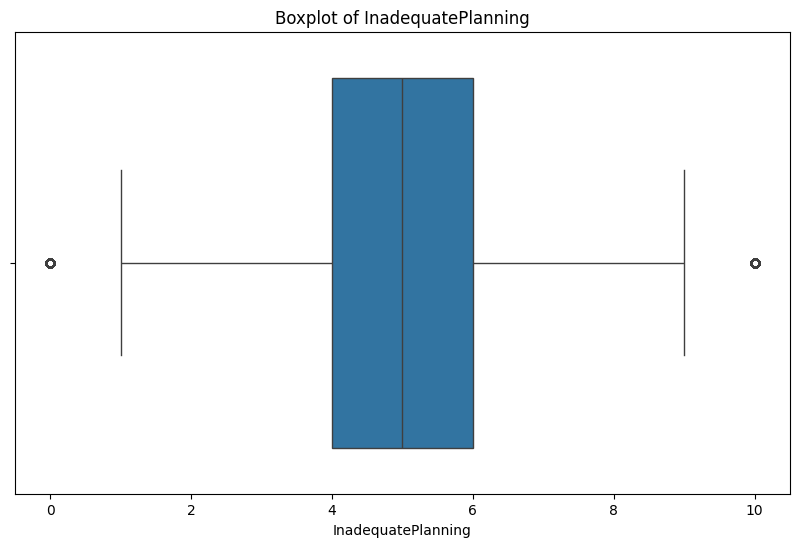

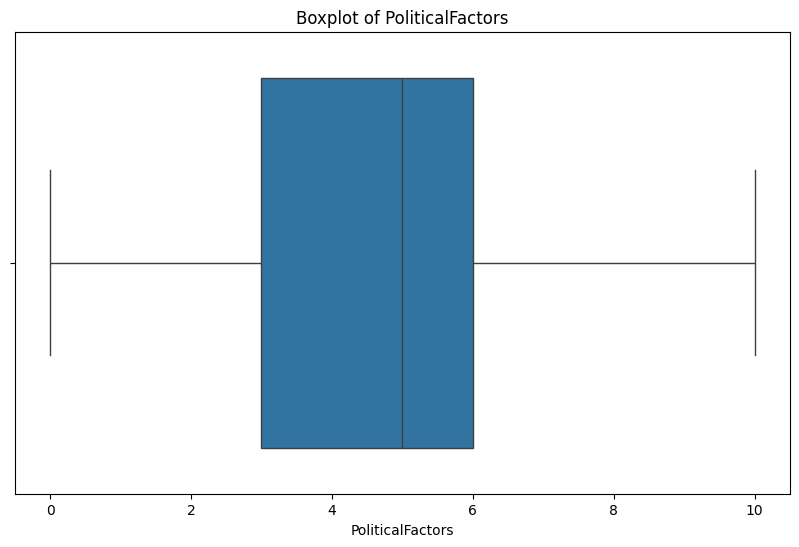

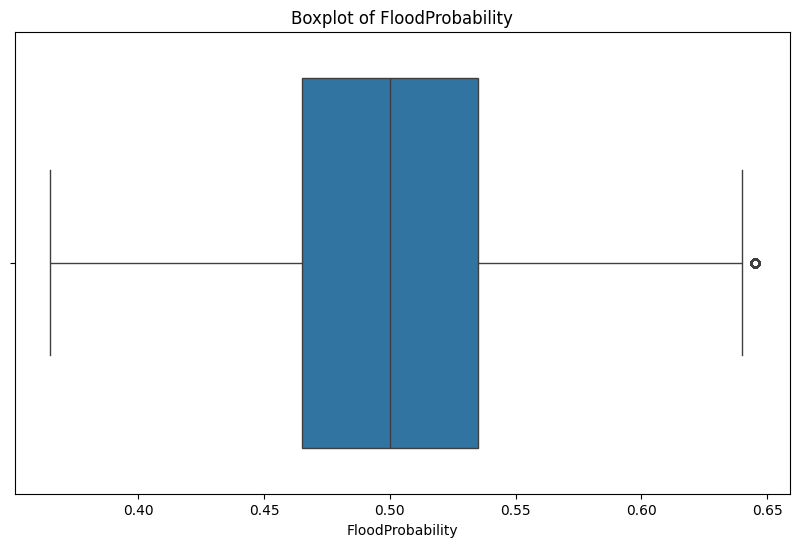

In [8]:
for feature in df_train.columns:
  plt.figure(figsize = (10, 6))
  sns.boxplot(x = df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

Setelah penanganan outliers menggunakan IQR, distribusi data menjadi lebih merata dan terpusat, dengan mean dan median yang mendekati satu sama lain. Di lain sisi, varians dan standar deviasi akan berkurang, lalu rentang data menyusut karena nilai yang berbeda telah diatasi.

Problem = standar deviasi besar hingga rentang data berbeda-beda

Tindakan yang diambil = Standarisasi

In [9]:
from sklearn.preprocessing import StandardScaler

# Memastikan hanya tipe data numerikal yang diproses
numeric_features = df.select_dtypes(include = ['number']).columns
numeric_features

# Standarisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df[numeric_features]

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,-1.732268,0.058002,1.550328,0.064284,1.683351,0.543778,-0.463123,-0.465651,-0.964121,-0.969523,...,0.071054,-0.967507,-0.957953,0.046708,-0.454798,1.062768,0.068580,1.048732,-0.959319,-1.122956
1,-1.732265,0.570302,1.050410,-0.468118,-0.467537,1.549104,1.573782,-0.998066,0.051310,-0.463606,...,1.140054,-1.470036,-2.465862,-0.957783,0.052873,-0.960584,-0.999582,-0.460240,-0.959319,-1.020641
2,-1.732262,0.570302,0.050574,0.596686,1.145629,-0.964210,1.064556,-2.062896,0.051310,-0.463606,...,1.140054,-0.967507,1.052592,0.046708,0.560545,1.568606,-1.533663,-0.963231,-0.959319,0.616394
3,-1.732259,-0.966598,-0.449345,0.596686,0.070185,-0.461547,1.573782,-0.465651,1.066740,0.548227,...,-1.532446,-0.464978,1.052592,-0.455538,-0.454798,0.556930,0.068580,1.048732,0.043751,0.718708
4,-1.732256,0.058002,-0.949263,-1.532923,0.607907,-0.461547,-0.463123,-0.998066,-0.964121,-0.969523,...,-1.532446,-1.470036,0.549956,0.548954,-0.454798,-1.972260,-1.533663,-0.963231,0.043751,-1.736844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117951,1.732011,0.570302,-0.449345,1.661491,-0.467537,-0.461547,-0.972350,-0.998066,-0.456406,2.571894,...,0.071054,-0.967507,-0.455317,-1.460029,2.591231,-0.960584,0.602661,-0.460240,0.043751,-0.099809
1117953,1.732017,-1.478898,-1.449181,-0.468118,-1.005258,2.051766,0.046103,1.664008,-1.979552,-0.969523,...,2.209054,-0.464978,-0.455317,-0.957783,1.068217,-0.454746,2.204904,-0.460240,0.043751,-0.406753
1117954,1.732020,1.082602,-0.949263,2.193893,-0.467537,0.543778,0.046103,2.196423,-1.979552,-0.969523,...,0.071054,0.037552,0.047320,0.046708,0.560545,0.051092,0.068580,-1.466222,-0.457784,-0.304438
1117955,1.732024,1.082602,-0.949263,-1.000520,1.145629,0.041116,-1.481576,-0.998066,-0.456406,0.548227,...,0.605554,1.545139,0.047320,-0.957783,-0.454798,0.556930,1.136742,0.545741,-0.457784,-0.099809


In [10]:
# Cek Data Duplikat
duplicates = df.duplicated()

print('Baris duplikat : ')
print(df[duplicates])

Baris duplikat : 
Empty DataFrame
Columns: [id, MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors, FloodProbability]
Index: []

[0 rows x 22 columns]


In [11]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,...,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05
mean,3.128825e-16,-1.722920e-16,-8.252983e-18,-1.122910e-16,-1.138030e-16,-1.484907e-17,1.193637e-16,1.572309e-16,-1.516197e-17,1.194309e-16,...,-2.232715e-17,-1.108210e-16,-1.940060e-16,-1.644633e-16,-2.222467e-16,5.821188e-17,1.895708e-16,1.429887e-16,-7.076985e-17,-6.328547e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.732268e+00,-2.503498e+00,-2.449018e+00,-2.065325e+00,-2.080702e+00,-2.472198e+00,-2.500029e+00,-2.062896e+00,-2.487267e+00,-2.487272e+00,...,-2.066946e+00,-2.475094e+00,-2.465862e+00,-2.464520e+00,-2.485485e+00,-2.478098e+00,-2.067744e+00,-2.472204e+00,-2.463924e+00,-2.759991e+00
25%,-8.661751e-01,-4.542981e-01,-9.492630e-01,-4.681183e-01,-4.675365e-01,-4.615469e-01,-4.631232e-01,-4.656514e-01,-4.564057e-01,-4.636059e-01,...,-4.634462e-01,-4.649776e-01,-9.579532e-01,-9.577833e-01,-4.547982e-01,-4.547462e-01,-4.655010e-01,-4.602404e-01,-9.593186e-01,-7.136972e-01
50%,2.024918e-05,5.800187e-02,5.057361e-02,6.428396e-02,7.018534e-02,4.111574e-02,4.610324e-02,6.676350e-02,5.130956e-02,4.231074e-02,...,7.105385e-02,3.755159e-02,4.731955e-02,4.670802e-02,5.287338e-02,5.109174e-02,6.857993e-02,4.275047e-02,4.375149e-02,2.505596e-03
75%,8.661002e-01,5.703019e-01,5.504919e-01,5.966862e-01,6.079072e-01,5.437784e-01,5.553296e-01,5.991784e-01,5.590249e-01,5.482274e-01,...,6.055539e-01,5.400808e-01,5.499559e-01,5.489537e-01,5.605450e-01,5.569297e-01,6.026608e-01,5.457413e-01,5.452865e-01,7.187084e-01
max,1.732027e+00,2.619502e+00,2.550165e+00,2.193893e+00,2.221073e+00,2.554429e+00,2.592235e+00,2.196423e+00,2.589886e+00,2.571894e+00,...,2.209054e+00,2.550197e+00,2.560501e+00,2.557936e+00,2.591231e+00,2.580282e+00,2.204904e+00,2.557705e+00,2.551427e+00,2.969631e+00


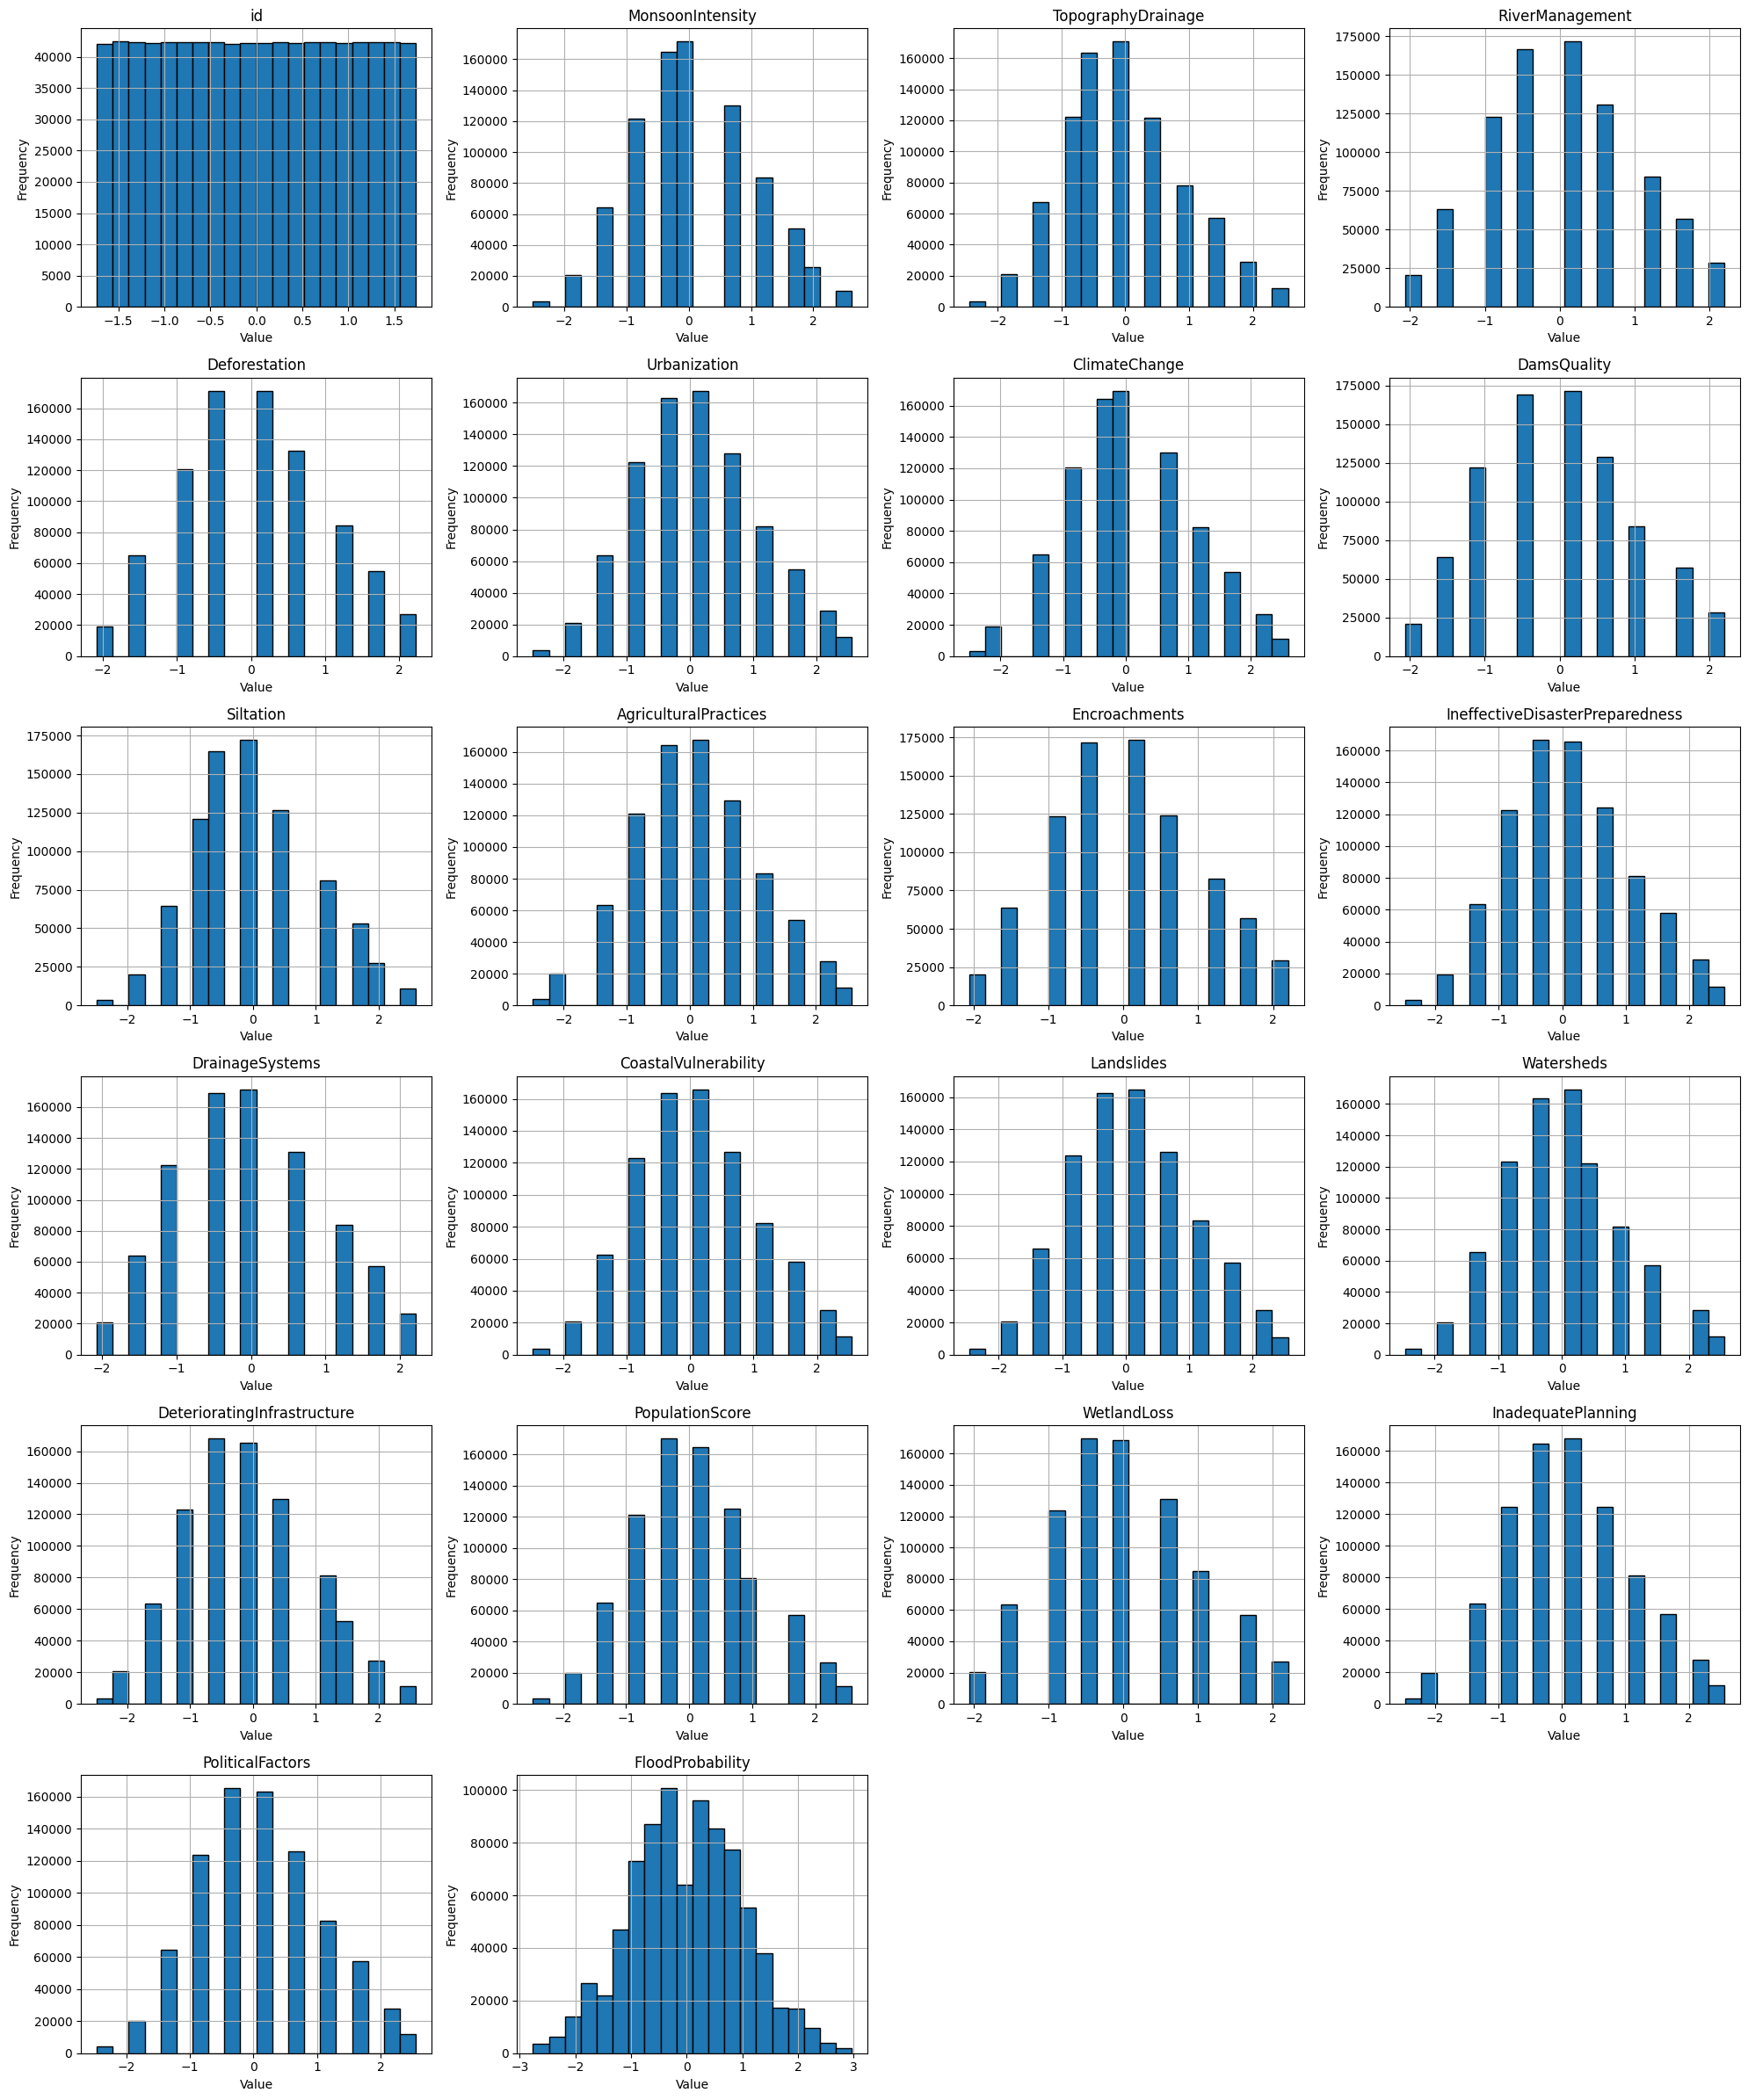

In [12]:
# Menghitung jumlah variable
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4   # jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)   # Ceiling division untuk menentukan jumlah baris

# Buat Subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize = (20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variable
for i, column in enumerate(df.columns):
  df[column].hist(ax = axes[i], bins = 20, edgecolor = 'black')
  axes[i].set_title(column)
  axes[i].set_xlabel('Value')
  axes[i].set_ylabel('Frequency')

# Menghapus subplots yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapih
plt.tight_layout()
plt.show()

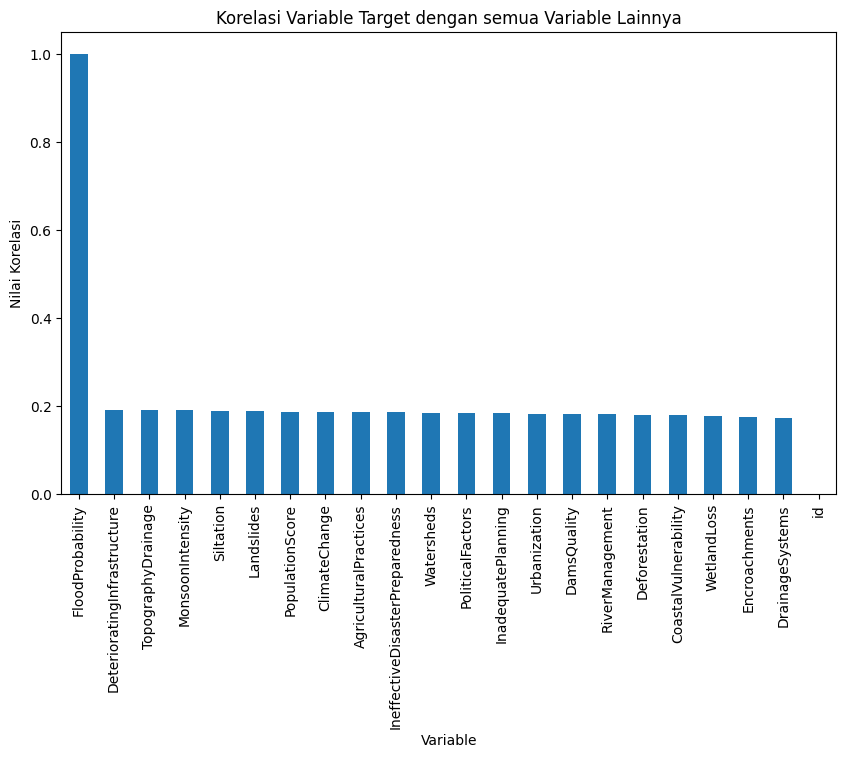

In [13]:
# Menghitung korelasi antara variable target dan semua variable lainnya
target_corr = df.corr()['FloodProbability']

# Mengurutkan hasil korelasi berdasarkan kekuatan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending = False)

plt.figure(figsize = (10,6))
target_corr_sorted.plot(kind = 'bar')
plt.title('Korelasi Variable Target dengan semua Variable Lainnya')
plt.xlabel('Variable')
plt.ylabel('Nilai Korelasi')
plt.show()

# Data Split

In [16]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns = ['FloodProbability'])
y = df['FloodProbability']

# Membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Menghitung panjang jumlah data
print('Jumlah data: ', len(X))

# Menghitung panjang jumlah data pada x_train
print('Jumlah data x_train: ', len(x_train))

# Menghitung panjang jumlah data pada x_test
print('Jumlah data x_test: ', len(x_test))

Jumlah data:  845886
Jumlah data x_train:  676708
Jumlah data x_test:  169178


# Modelling

## LARS

In [19]:
# =================== TRAINING ===================
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs = 1).fit(x_train, y_train)

pred_lars = lars.predict(x_test)

In [20]:
# ========== VALIDATION ============
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

print('MAE : ', mae_lars)
print('MSE : ', mse_lars)
print('R2 : ', r2_lars)

MAE :  0.8064108660421873
MSE :  1.0011650665986356
R2 :  9.307124908519704e-05


In [21]:
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE' : [mae_lars],
    'MSE' : [mse_lars],
    'R2' : [r2_lars]
}

# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index = ['LARS'])
df_results

,MAE,MSE,R2
LARS,0.806411,1.001165,0.000093


## Linear Regression

In [22]:
# ============== TRAINING =============
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(x_train, y_train)

pred_LR = LR.predict(x_test)

In [23]:
# ============== VALIDATION ==============
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

print('MAE : ', mae_LR)
print('MSE : ', mse_LR)
print('R2 : ', r2_LR)

MAE :  0.3296533481962674
MSE :  0.17176825459749176
R2 :  0.8284476020572757


In [24]:
# Memasukkan ke dalam data
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
LARS,0.806411,1.001165,0.000093
Linear Regression,0.329653,0.171768,0.828448


## GradientBoostingRegressor

In [27]:
# =========== TRAINING ===========
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state = 184)

GBR.fit(x_train, y_train)

pred_GBR = GBR.predict(x_test)

In [28]:
# ========= VALIDATION ============
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

print('MAE : ', mae_GBR)
print('MSE : ', mse_GBR)
print('R2 : ', r2_GBR)

MAE :  0.5129594793421594
MSE :  0.3808186715854765
R2 :  0.6196598932384723


In [29]:
# Memasukkan ke dalam data
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
LARS,0.806411,1.001165,0.000093
Linear Regression,0.329653,0.171768,0.828448
GradientBoostingRegressor,0.512959,0.380819,0.619660


Algoritma Linear Regression memiliki nilai evaluasi yang lebih baik jika dibandingkan dengan GradientBoostingRegressor. Mengapa hal itu bisa terjadi? Salah satu alasannya adalah data yang Anda gunakan memiliki hubungan sederhana antara fitur dan target atau bisa disebut linearitas. Jika hubungan antara variabel sangat sederhana dan linear, model ini akan terlalu kompleks (overfitting) dan memberikan hasil yang lebih buruk.